In [1]:
import mne 
import os
import mne 
from mne.io import  read_raw_edf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
data_folder ='data/'

In [3]:
# Set the path to the patient folder
data_files = sorted([f for f in os.listdir(data_folder) if f.startswith('chb')])
freq = 80
# Define the list of channels to keep
#channels_to_keep = ['T8-P8-1', 'T8-P8-0', 'T7-P7']# 
dataframes = []  # List to store individual DataFrames

for folder_list in range(1,len(data_files[:2])):  # Assumes folders are named ch01 to ch10
        folder_name = f'chb{folder_list:02d}'  # Format the folder name as ch01, ch02, etc.
        folder_path = os.path.join(data_folder,folder_name)  # Create the full path to the folder

        # Create an empty list to store raw data
        patient_raws = []

        # Create an empty list to store file names
        file_names = []

        # Get a list of .edf files sorted by filename numbers
        edf_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.edf')])

        # Read the first .edf file to obtain the channel information
        first_file_path = os.path.join(folder_path, edf_files[0])
        first_raw = mne.io.read_raw_edf(first_file_path, preload=True, verbose='ERROR')
        #first_raw.pick_channels(channels_to_keep)

        # Loop through the sorted .edf files
        for file in edf_files:
            file_path = os.path.join(folder_path, file)
            raw = mne.io.read_raw_edf(file_path, preload=True,verbose='ERROR')
            #Keep only the specified channels
            #raw.pick_channels(channels_to_keep)
            raw = raw.resample(sfreq=freq)

            # Set the channel information for each Raw object to match the first Raw object
            raw.info = first_raw.info
            raw_df = raw.to_data_frame()
            raw_df['file_name'] = file
            patient_raws.append(raw_df)
        
            #file_names.extend([file] * len(raw.times))

        # Concatenate the raw objects into a single patient_combined object while maintaining a continuous time axis
        #patient_combined = mne.concatenate_raws(patient_raws, preload=True)
        patient_combined = pd.concat(patient_raws, ignore_index=True)
        # Print info about the combined raw object for this patient
        #print(patient_combined.info)

        #df = patient_combined.to_data_frame()
        #df['file_name'] = file_names
        dataframes.append(patient_combined)
# Concatenate all DataFrames into a single DataFrame
final_dataframe = pd.concat(dataframes, ignore_index=True)


In [4]:
final_dataframe.tail()

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,file_name
11679035,1124.980469,22.390451,9.705652,0.559171,0.178125,13.025925,15.225065,7.485525,-1.986799,-1.227743,...,40.181022,22.483587,24.612771,-1.113182,-0.168450,0.446602,-41.994452,-21.004217,40.181022,chb01_46.edf
11679036,1124.984375,16.686342,5.319827,0.649495,-6.464237,13.796990,7.468098,4.303477,-9.323772,25.417927,...,27.368088,11.817596,12.645175,-7.274821,-0.258774,1.801105,-40.349586,-2.787446,27.368088,chb01_46.edf
11679037,1124.988281,7.506959,1.968538,0.134320,7.444000,13.317928,17.430020,1.603588,-13.929477,28.670261,...,41.833188,3.272109,7.534755,8.372928,0.256400,-5.361102,-19.476512,2.288666,41.833188,chb01_46.edf
11679038,1124.992188,-5.305887,-5.712087,2.216865,7.705812,4.922083,16.012732,-2.787765,-19.526783,38.785899,...,38.841640,-5.428684,18.265519,36.850667,-1.826145,-4.609653,-14.742141,11.466785,38.841640,chb01_46.edf
11679039,1124.996094,6.678498,-8.618266,7.778565,7.058769,25.813609,18.655583,-0.936746,-30.185511,31.628188,...,37.061335,4.745219,15.555099,31.688187,-7.387845,-7.972084,-7.471728,12.502885,37.061335,chb01_46.edf


In [5]:
df = final_dataframe.drop("file_name", axis =1)

/var/folders/qc/mckg6k9d38ngx5rhh3c9fbpr0000gp/T/ipykernel_42864/1161307762.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)


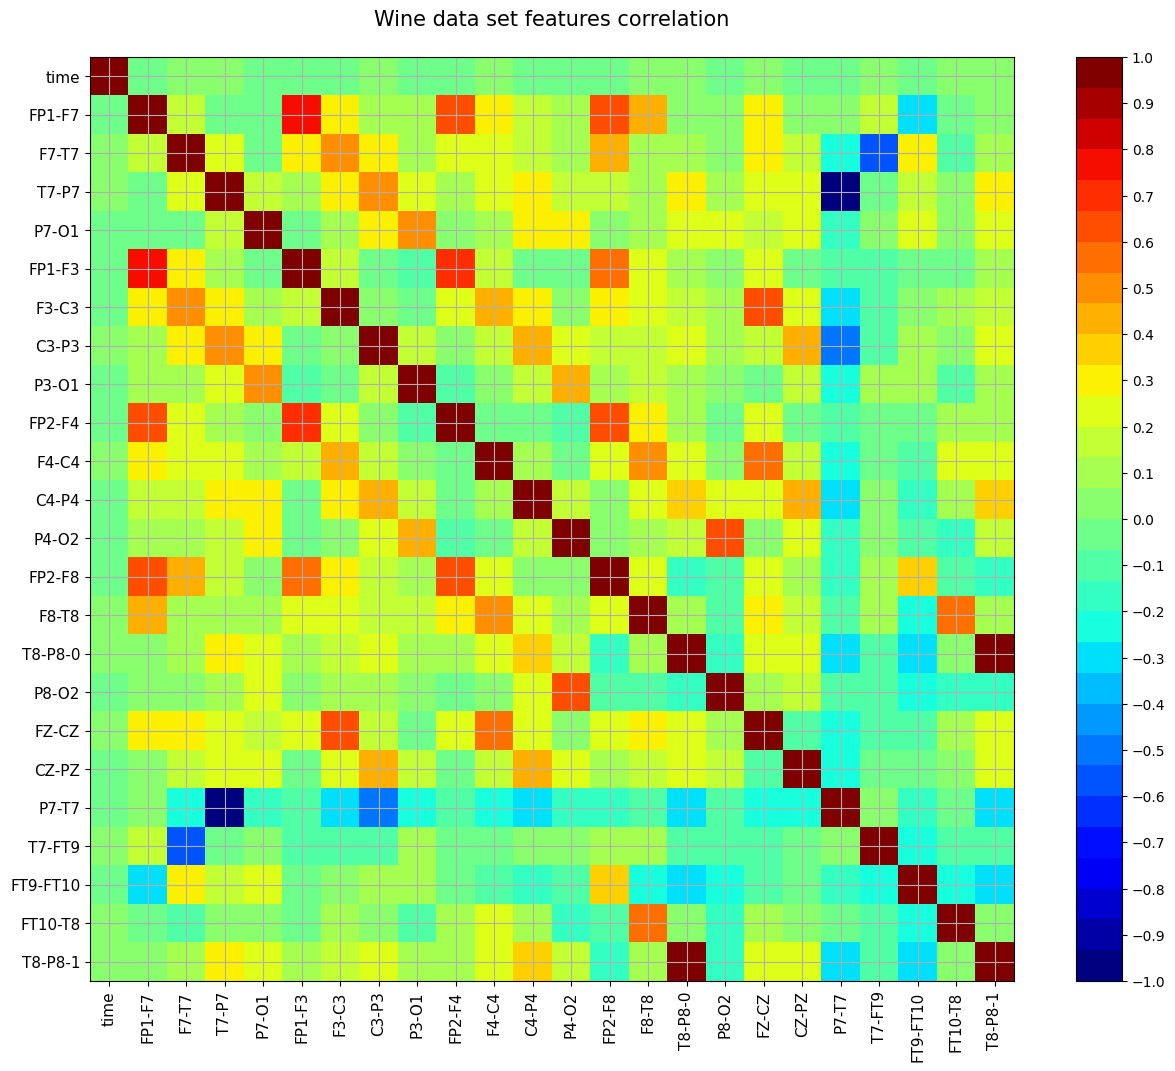

In [6]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('EEg data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticks(np.arange(24))
    ax1.set_xticklabels(labels,fontsize=11, rotation=90)
    ax1.set_yticks(np.arange(24))
    ax1.set_yticklabels(labels,fontsize=11)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
len(df.columns[1:])

23

In [10]:
df_notime = df.drop("time", axis =1)

In [11]:
df_scaled = scaler.fit_transform(df_notime)
df_scaled = pd.DataFrame(data=df_scaled,columns=df.columns[1:])

In [12]:
df_scaled.describe()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
count,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,...,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07,1.167904e+07
mean,-6.041326e-18,-8.605544e-18,4.772222e-18,2.064120e-18,1.202972e-17,8.648284e-19,-3.239684e-19,1.464565e-17,4.175542e-18,5.091019e-18,...,2.103665e-18,-1.364801e-17,3.086522e-18,8.592007e-19,-5.684809e-18,1.190014e-18,-1.077248e-17,6.375714e-18,1.550189e-17,-1.364801e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.782689e+01,-4.261223e+01,-4.148291e+01,-5.613753e+01,-2.791528e+01,-3.885368e+01,-5.006458e+01,-4.666922e+01,-2.556102e+01,-3.729741e+01,...,-3.928396e+01,-3.514579e+01,-3.118923e+01,-3.744548e+01,-4.222808e+01,-5.221931e+01,-4.163485e+01,-2.916195e+01,-6.262688e+01,-3.514579e+01
25%,-2.989012e-01,-4.037817e-01,-4.666308e-01,-4.489550e-01,-3.631537e-01,-4.422140e-01,-4.336212e-01,-4.717846e-01,-3.860910e-01,-4.268765e-01,...,-4.454483e-01,-3.963291e-01,-3.646937e-01,-4.143753e-01,-4.035607e-01,-4.676587e-01,-4.271867e-01,-3.733858e-01,-4.272706e-01,-3.963291e-01
50%,-5.710846e-03,9.684226e-04,3.328051e-03,1.192456e-02,-6.299032e-03,2.761896e-03,-8.227305e-07,3.629527e-03,-1.078613e-02,5.157371e-03,...,-8.669792e-03,1.005209e-02,7.292008e-03,3.876427e-03,-1.810150e-03,-3.328051e-03,-5.637102e-04,-3.315145e-03,-3.148085e-03,1.005209e-02
75%,2.762153e-01,4.006717e-01,4.676587e-01,4.588086e-01,3.347162e-01,4.450095e-01,4.292879e-01,4.740588e-01,3.507290e-01,4.327713e-01,...,4.228679e-01,4.105323e-01,3.718786e-01,4.212457e-01,3.964387e-01,4.666308e-01,4.294155e-01,3.657245e-01,4.117948e-01,4.105323e-01
max,2.592659e+01,4.509642e+01,5.221931e+01,5.810745e+01,2.616400e+01,4.145558e+01,4.899638e+01,4.768708e+01,2.695931e+01,4.119132e+01,...,2.666804e+01,3.337125e+01,3.617393e+01,3.524916e+01,3.979478e+01,4.148291e+01,5.888239e+01,2.547893e+01,5.594229e+01,3.337125e+01


In [13]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11679040 entries, 0 to 11679039
Data columns (total 23 columns):
 #   Column    Dtype  
---  ------    -----  
 0   FP1-F7    float64
 1   F7-T7     float64
 2   T7-P7     float64
 3   P7-O1     float64
 4   FP1-F3    float64
 5   F3-C3     float64
 6   C3-P3     float64
 7   P3-O1     float64
 8   FP2-F4    float64
 9   F4-C4     float64
 10  C4-P4     float64
 11  P4-O2     float64
 12  FP2-F8    float64
 13  F8-T8     float64
 14  T8-P8-0   float64
 15  P8-O2     float64
 16  FZ-CZ     float64
 17  CZ-PZ     float64
 18  P7-T7     float64
 19  T7-FT9    float64
 20  FT9-FT10  float64
 21  FT10-T8   float64
 22  T8-P8-1   float64
dtypes: float64(23)
memory usage: 2.0 GB


In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=None)

In [16]:
df_pca = pca.fit(df_scaled)

In [17]:
df_pca.explained_variance_

array([4.82882731e+00, 3.19142372e+00, 2.35964298e+00, 2.01986706e+00,
       1.62905179e+00, 1.55136502e+00, 1.24970481e+00, 1.20260464e+00,
       1.02024473e+00, 8.27459478e-01, 6.95467939e-01, 5.84989390e-01,
       4.93518609e-01, 3.61869225e-01, 2.78554373e-01, 2.40276159e-01,
       2.17752002e-01, 1.84705265e-01, 6.25543145e-02, 7.42114951e-05,
       4.89464440e-05, 2.06339796e-30, 3.27794361e-31])

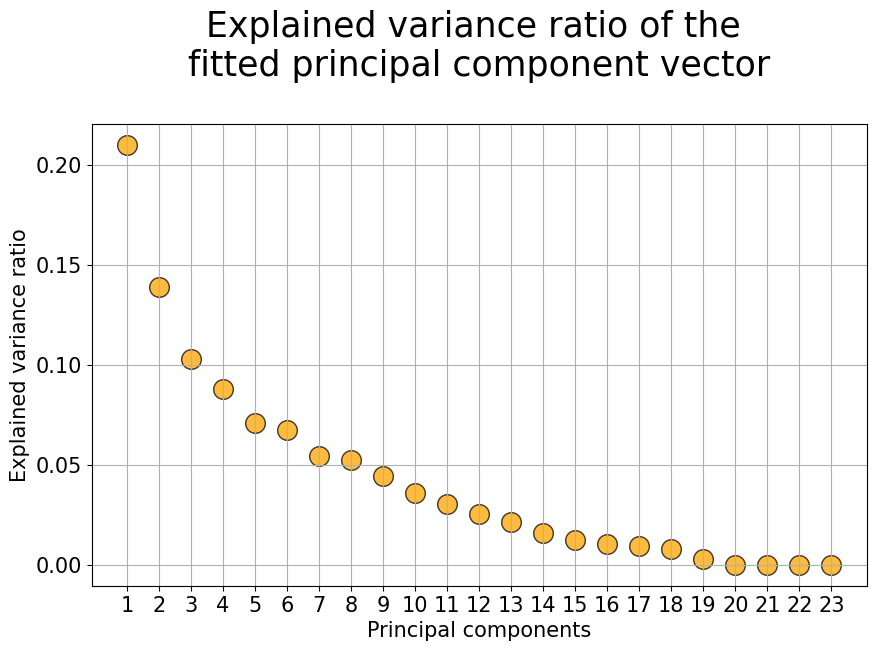

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))],
            y=df_pca.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [19]:
df_trans = pca.transform(df_scaled)
df_trans = pd.DataFrame(data=df_trans)
df_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-3.844994,-5.714943,-6.822902,-0.003973,-2.680878,0.614758,-4.031741,-2.736332,1.787292,-0.008548,...,0.249142,-0.043824,-0.554858,0.121336,0.850769,0.661175,-0.002727,-0.004484,-1.398488e-15,2.763558e-16
1,0.641381,0.906630,1.116637,-0.065583,0.445520,-0.071976,0.718045,0.367100,-0.278796,0.016624,...,-0.047916,0.045065,0.084614,-0.021561,-0.162109,-0.112512,0.000537,0.002460,2.158762e-16,7.746121e-17
2,-0.369029,-0.498457,-0.628367,0.075251,-0.229109,0.006733,-0.425272,-0.139526,0.157548,-0.037676,...,0.026411,-0.050353,-0.049310,0.007613,0.123601,0.071411,-0.003403,0.000602,-9.210285e-17,-6.526769e-17
3,0.276426,0.160714,0.387201,-0.604558,0.250519,0.254591,0.686064,-0.420344,-0.026081,0.107964,...,-0.057237,0.346228,-0.033646,-0.022250,-0.228812,-0.081623,-0.001753,-0.001851,-2.197318e-16,1.662465e-16
4,-0.359254,-1.178967,-0.546554,-2.004790,0.547314,0.475876,1.329059,-1.685606,0.657106,-0.088032,...,-0.351436,1.034801,-0.395905,-0.190349,-0.021704,-0.033332,-0.011965,0.000053,-5.869382e-16,3.515962e-16
5,-0.485160,-0.266408,-0.769937,-1.232213,0.293165,0.834089,0.687774,-0.563805,0.664904,0.396328,...,-0.248067,0.768769,-0.008603,-0.345771,-0.378390,-0.207136,-0.009514,0.010558,1.097089e-16,1.549454e-16
6,-0.553702,-0.030522,-0.550595,-1.296933,0.052023,0.145273,1.172956,-1.186819,0.341995,0.061507,...,-0.606908,0.982155,-0.176260,-0.090737,-0.147548,-0.181310,-0.002987,-0.001665,-1.661537e-16,2.092518e-16
7,-0.168181,0.914330,0.308175,-0.483776,0.162969,0.574186,0.788412,-0.081698,-0.128276,0.107331,...,-0.066736,0.911504,-0.025646,-0.133317,0.071885,-0.322453,-0.005703,0.001139,4.400091e-16,-9.494436e-17
8,-0.382169,0.784921,0.268879,-0.389352,0.060634,-0.200705,1.653369,-0.502540,0.132244,0.061626,...,0.025155,0.838282,0.455020,-0.276016,0.048385,-0.390781,-0.005491,-0.010896,-2.526170e-16,-1.983979e-16
9,-0.877524,1.294086,0.829850,0.242900,0.348097,-0.590158,1.127811,0.900559,0.492335,-0.207991,...,0.121131,0.533388,0.231041,-0.313448,0.120049,-0.404608,0.004654,-0.006007,6.204149e-16,-1.335936e-16


In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df_trans[0],df_trans[1],edgecolors='k',alpha=0.75,s=80)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_scaled_trans[0],X_train_scaled_trans[1],c=y_train,edgecolors='k',alpha=0.75,s=150)
classes = ['1', '2', '3']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [ ]:
# Loop through subfolders in the main data folder
folder_path = './data/'
all_data = []

for folder_name in os.listdir(folder_path):
    if not folder_name.startswith('chb'):
        continue
    folder_path = os.path.join(folder_path, folder_name)
    # Check if the item in the main folder is a directory (subfolder)
    if os.path.isdir(folder_path):
        # Loop through the text files in the subfolder
        for filename in os.listdir(folder_path):
            if filename.endswith(".txt") and filename.startswith("chb"):
                file_path = os.path.join(folder_path, filename)
                
                # Extract the part of the filename before the hyphen as the "Source File" value
                source_file = filename.split("-")[0]
                
                # Initialize a list to store data for each file
                data = []
                
                # # Initialize a dictionary to hold the current data
                current_data = {"File Name": None, "Number of Seizures": None, "Seizure Start Time": np.nan, "Seizure End Time": np.nan, "Source File": source_file}
                
                # Open and read the current text file
                with open(file_path, "r") as file:
                    for line in file:
                        line = line.strip()
                        if line.startswith("File Name:"):
                            current_data = {"File Name": None, "Number of Seizures": None, "Seizure Start Time": np.nan, "Seizure End Time": np.nan, "Source File": source_file}
                            current_data["File Name"] = line.split(": ", 1)[1]
                        elif line.startswith("Number of Seizures in File:"):
                            current_data["Number of Seizures"] = line.split(": ",1)[1]
                            if current_data["Number of Seizures"] == 0:
                                data.append(current_data.copy())
                        elif line.startswith("Seizure Start Time:"):
                            current_data["Seizure Start Time"] = int(line.split(": ", 1)[1].split()[0])
                        elif line.startswith("Seizure End Time:"):
                            current_data["Seizure End Time"] = int(line.split(": ", 1)[1].split()[0])
                            data.append(current_data.copy())
                
                all_data.extend(data)

# Create a DataFrame from the collected data
seizure_seq = pd.DataFrame(all_data)
seizure_seq = seizure_seq.rename(columns={"File Name": "file_name"})
seizure_seq["Seizure Start Time"] = seizure_seq["Seizure Start Time"].astype(float)
seizure_seq["Seizure End Time"] = seizure_seq["Seizure End Time"].astype(float)

# Display the DataFrame
print(seizure_seq)

      file_name Number of Seizures  Seizure Start Time  Seizure End Time  \
0  chb03_01.edf                  1                 362               414   
1  chb03_02.edf                  1                 731               796   
2  chb03_03.edf                  1                 432               501   
3  chb03_04.edf                  1                2162              2214   
4  chb03_34.edf                  1                1982              2029   
5  chb03_35.edf                  1                2592              2656   
6  chb03_36.edf                  1                1725              1778   

  Source File  
0       chb03  
1       chb03  
2       chb03  
3       chb03  
4       chb03  
5       chb03  
6       chb03  


In [ ]:
# Define a function to check if a recording occurred during a seizure
def during_seizure(file_name, time):
    seizure_data = seizure_seq[seizure_seq["file_name"] == file_name]
    if not seizure_data.empty:
        return any((time >= seizure_data["Seizure Start Time"]) & (time <= seizure_seq["Seizure End Time"]))
    else:
        return False

In [ ]:
final_dataframe["seizure"] = final_dataframe.apply(lambda row: during_seizure(row["file_name"], row["time"]), axis=1)

KeyboardInterrupt: 

In [ ]:
final_dataframe.tail()

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,file_name,Number of Seizures,Seizure Start Time,Seizure End Time,Source File,seizure_sequence
34937211,63479.480469,-115.782722,134.907221,-46.812467,1.358508,-24.280219,7.271520,-37.914306,28.991814,-40.537569,...,-24.796244,-6.904201,-8.270946,-45.686923,chb02_35.edf,NaN,NaN,NaN,NaN,False
34937212,63479.484375,-222.561781,194.940960,-50.500316,-15.615978,-49.505983,-11.458245,-35.386708,3.300393,-40.070918,...,-61.071168,9.364014,-26.803702,-14.750472,chb02_35.edf,NaN,NaN,NaN,NaN,False
34937213,63479.488281,-81.687330,49.461055,48.180296,-22.157032,-1.797041,33.254509,-40.797284,3.367640,-39.517940,...,45.751252,14.268259,-55.746283,-14.380229,chb02_35.edf,NaN,NaN,NaN,NaN,False
34937214,63479.492188,-111.241961,94.053730,7.131500,-4.767848,-17.389396,33.662479,-40.187919,10.268091,-30.708338,...,-14.590857,15.875116,-48.629292,6.590191,chb02_35.edf,NaN,NaN,NaN,NaN,False
34937215,63479.496094,-40.555302,45.929406,-14.705387,9.535962,-32.466193,43.082463,-40.838351,30.218679,-8.612591,...,20.085840,1.748631,-14.146080,-56.972049,chb02_35.edf,NaN,NaN,NaN,NaN,False
